import dependies

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data preprocessing

In [49]:
df = pd.read_csv('Loan Predication data.csv')

In [50]:
df.shape

(614, 13)

In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [53]:
#dropping the missing values
df = df.dropna()
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [55]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [56]:
#label encoding
df = df.replace({"Loan_Status":{'N':0,'Y':1}})
df.head()

/tmp/ipython-input-56-197110587.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Loan_Status":{'N':0,'Y':1}})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [57]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [58]:
#dependens replacing 3+ to 4
df = df.replace({'Dependents':{'3+':4}})
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: ylabel='count'>

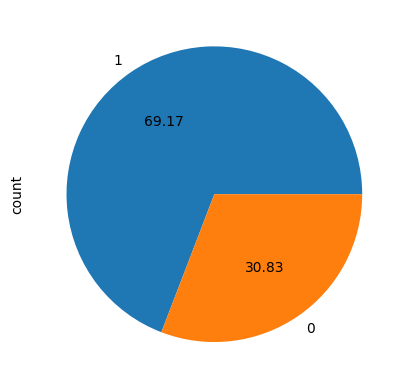

In [59]:
#Loan_Status data distribution
df['Loan_Status'].value_counts().plot.pie(autopct='%.2f')

<Axes: xlabel='Education', ylabel='count'>

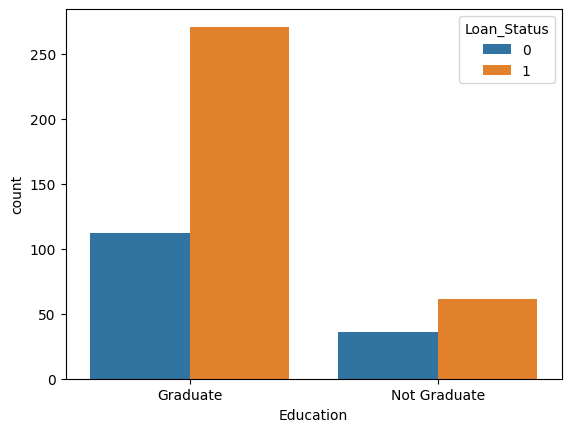

In [60]:
#comparison of education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

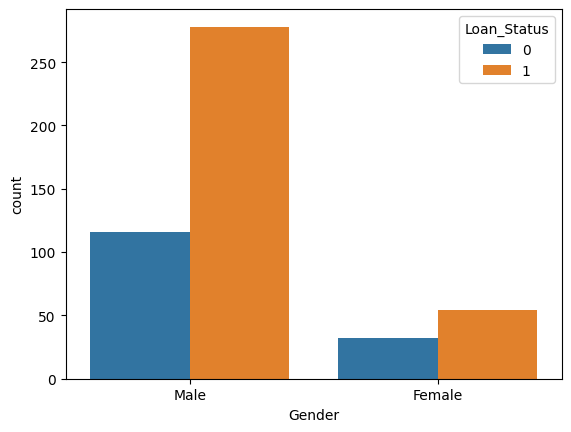

In [61]:
#comparison of Gender and loan status
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

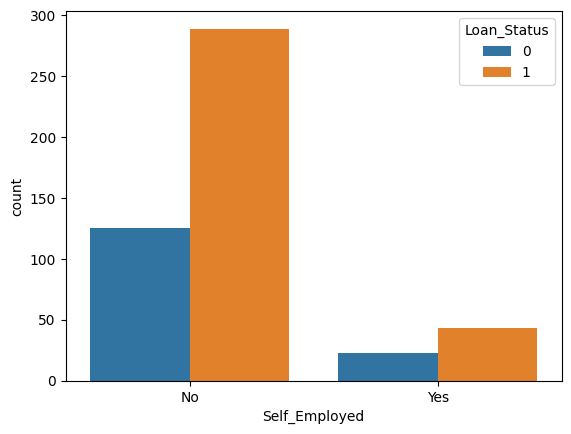

In [62]:
#comparison of Self_Employed and loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

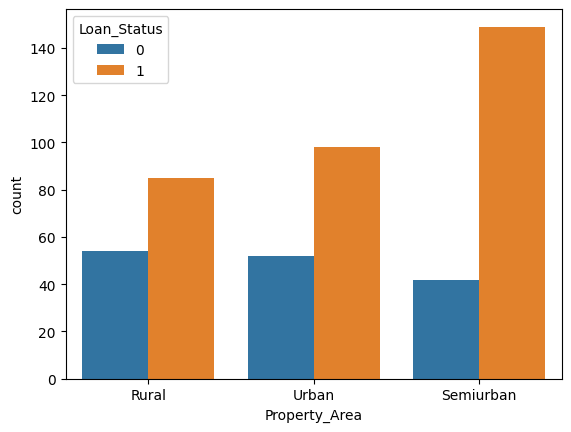

In [63]:
#comparison of Property_Area and loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

In [64]:
#Convert categorial to numercal data
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.head()

/tmp/ipython-input-64-2165657368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [65]:
#Remove loan id and convert loan status into numerical
df = df.drop(columns=['Loan_ID'],axis=1)
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [66]:
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [67]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train and Test data split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model

In [70]:
model = svm.SVC(kernel='linear')

In [71]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [72]:
pred = model.predict(X_test)

model evalution

In [73]:
accuracy = accuracy_score(pred, Y_test)
print(accuracy)

0.8333333333333334


Making predicting system

In [81]:
input_data = ('Male',	'No',	0,	'Not Graduate',	'No',	2333,	1451,	102,	480,	0,	'Urban') #loan_status=no
input_df = pd.DataFrame([input_data], columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
input_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
input_df.head()
prediction = model.predict(input_df)
if prediction[0] == 0:
  print('Loan Rejected')
else:
  print('Loan Approved')

Loan Rejected


/tmp/ipython-input-81-3437506761.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
